# Tutorial Step 2: What's in a GWOSC Data File?

In this tutorial, we will use Python to read a GWOSC data file. If you don't have an HDF5 GWOSC data file stored on your computer somewhere, go back to [Step 1](<./01 - Download GWOSC Data.ipynb>).

## Data File Overview

Let's try to read in and plot some data.

In [1]:
#----------------------
# Import needed modules
#----------------------
import numpy as np
import matplotlib.pylab as plt
import h5py

In [2]:
#--------------
# Open the File
#--------------
fileName = 'H-H1_GWOSC_O3b_4KHZ_R1-1264312320-4096.hdf5'
dataFile = h5py.File(fileName, 'r')

In [3]:
#-----------------
# Explore the file
#-----------------
for key in dataFile.keys():
    print(key)

meta
quality
strain


## Plot a time series

Let's continue our exploration to make a plot of a few seconds of data. To store the strain data in a convenient place, use the code below:

In [4]:
#--------------------
# Read in strain data
#--------------------
strain = dataFile['strain']['Strain']
ts = dataFile['strain']['Strain'].attrs['Xspacing']

The code above accesses the `'Strain'` data object that lives inside the group `'strain'` - we store this as `strain`.
The "attribute" `'Xspacing'` tells how much time there is between each sample, and we store this as `ts`.
To see all the structure of a GWOSC data file, see the end of this tutorial.

Now, let's use the meta-data to make a vector that will label the time stamp of each sample. In the same way that we indexed `dataFile` as a Python dictionary, we can also index `dataFile['meta']`. To see what meta-data we have to work with, use the code below:

In [5]:
#-------------------------
# Print out some meta data
#-------------------------
metaKeys = dataFile['meta'].keys()
meta = dataFile['meta']
for key in metaKeys:
    print(key, meta[key])

Description <HDF5 dataset "Description": shape (), type "|O">
DescriptionURL <HDF5 dataset "DescriptionURL": shape (), type "|O">
Detector <HDF5 dataset "Detector": shape (), type "|O">
Duration <HDF5 dataset "Duration": shape (), type "<i8">
FrameType <HDF5 dataset "FrameType": shape (), type "|O">
GPSstart <HDF5 dataset "GPSstart": shape (), type "<i8">
Observatory <HDF5 dataset "Observatory": shape (), type "|O">
StrainChannel <HDF5 dataset "StrainChannel": shape (), type "|O">
Type <HDF5 dataset "Type": shape (), type "|O">
UTCstart <HDF5 dataset "UTCstart": shape (), type "|O">


You should see that the GPS start time and the duration are both stored as meta-data.
To calculate how much time passes between samples, we can divide the total duration by the number of samples:

In [6]:
#---------------------
# Create a time vector
#---------------------
gpsStart = meta['GPSstart'][()]
duration = meta['Duration'][()]
gpsEnd   = gpsStart + duration

time = np.arange(gpsStart, gpsEnd, ts)

The numpy command `arange` creates an array (think a column of numbers) that starts at `gpsStart`, ends at `gpsEnd` (non-inclusive), and has an increment of `ts` between each element.

We can now plot the data:

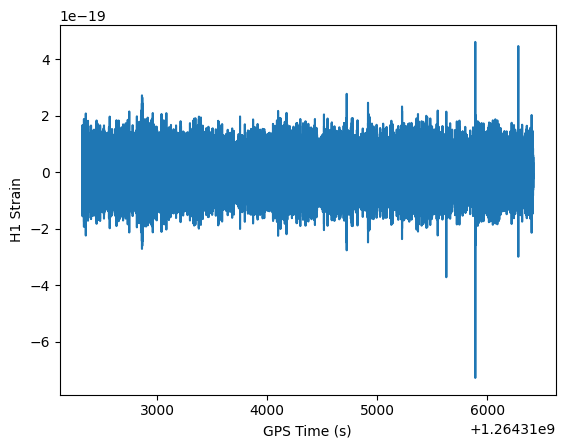

In [7]:
#---------------------
# Plot the time series
#---------------------
plt.plot(time, strain[()])
plt.xlabel('GPS Time (s)')
plt.ylabel('H1 Strain')
plt.show()

Finally, let's use all of this to plot a few seconds worth of data.
Since this data is sampled at 4096 Hz, 10,000 samples corresponds to about 2.4 s.
We will start at time 1256779566.0.

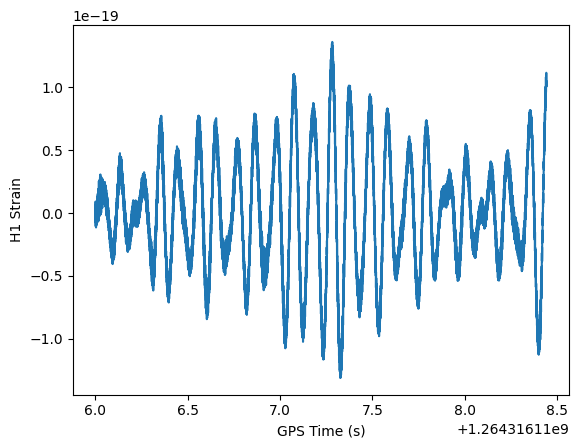

In [8]:
#------------------------
# Zoom in the time series
#------------------------
numsamples = 10000
startTime  = 1264316116.0
startIndex = np.min(np.nonzero(startTime < time))
time_seg   = time[startIndex:(startIndex+numsamples)]
strain_seg = strain[startIndex:(startIndex+numsamples)]
plt.plot(time_seg, strain_seg)
plt.xlabel('GPS Time (s)')
plt.ylabel('H1 Strain')
plt.show()

You may be surprised that the data looks smooth and curvy, rather than jagged and jumpy as you might expect for [white noise](https://en.wikipedia.org/wiki/White_noise).
That's because white noise has roughly equal power at all frequencies, which GW data does not.
Rather, GW data includes noise that is a strong function of frequency - we often say the noise is "colored" to distinguish it from white noise.
The wiggles you see in the plot above are at the low end of the LVK band (around 20 Hz).
In general, GW noise is dominated by these low frequencies.
To learn more about GW noise as a function of frequency, take a look at the [Step 4 of this tutorial](<04 - Working in Frequency Domain.ipynb>). 

## Going further: View Contents of a GWOSC HDF5 file

The data file uses the standard [HDF5 file format](https://www.hdfgroup.org/solutions/hdf5).
This format is used to store large amounts of scientific data and their meta-data (called attributes) in a hierarchical structure and process them efficiently.
It is a common format in the scientific world and there are many tools and libraries to work with such files.

We will present some tools to view the contents of the file.

### Option 1: Use HDFView

A helpful, free software for viewing the structure of an HDF5 file is the [HDFView tool](https://www.hdfgroup.org/downloads/hdfview/), which can be downloaded from the HDF Group web site.

This will give you an interactive display of a GWOSC data file.

### Option 2: Use Python

Alternatively, you can write a short python script for viewing the structure of a GWOSC data file like this:

In [9]:
import h5py

def dump_info(name, obj):
    print("{0} :".format(name))
    try:
        print("   value: {0}".format(str(obj[()])))
        for key in obj.attrs.keys():
            print("     attrs[{0}]:  {1}".format(key, obj.attrs[key]))
    except:
        pass

filename = 'H-H1_GWOSC_O3b_4KHZ_R1-1264312320-4096.hdf5'
file = h5py.File(filename)
file.visititems(dump_info)

meta :
meta/Description :
   value: b'Strain data time series from LIGO'
meta/DescriptionURL :
   value: b'http://www.gw-openscience.org/'
meta/Detector :
   value: b'H1'
meta/Duration :
   value: 4096
meta/FrameType :
   value: b'H1_HOFT_CLEAN_SUB60HZ_C01'
meta/GPSstart :
   value: 1264312320
meta/Observatory :
   value: b'H'
meta/StrainChannel :
   value: b'H1:DCS-CALIB_STRAIN_CLEAN_SUB60HZ_C01'
meta/Type :
   value: b'StrainTimeSeries'
meta/UTCstart :
   value: b'2020-01-29T05:51:42'
quality :
quality/detail :
quality/injections :
quality/injections/GWOSCmeta :
   value: b'GWOSC-4KHZ_R1_INJMASK'
quality/injections/InjDescriptions :
   value: [b'no cbc injection' b'no burst injections' b'no detchar injections'
 b'no continuous wave injections' b'no stoch injections']
quality/injections/InjShortnames :
   value: [b'NO_CBC_HW_INJ' b'NO_BURST_HW_INJ' b'NO_DETCHAR_HW_INJ' b'NO_CW_HW_INJ'
 b'NO_STOCH_HW_INJ']
quality/injections/Injmask :
   value: [23 23 23 ... 23 23 23]
     attrs[Bits]:

<div class="alert alert-block alert-info">
<div><b>&#9432; Note</b></div>
    You can save the code above in a python script to reuse it.
</div>

## What's next?

In the [next step](<03 - Working with Data Quality.ipynb>), you will learn how to work with data quality.